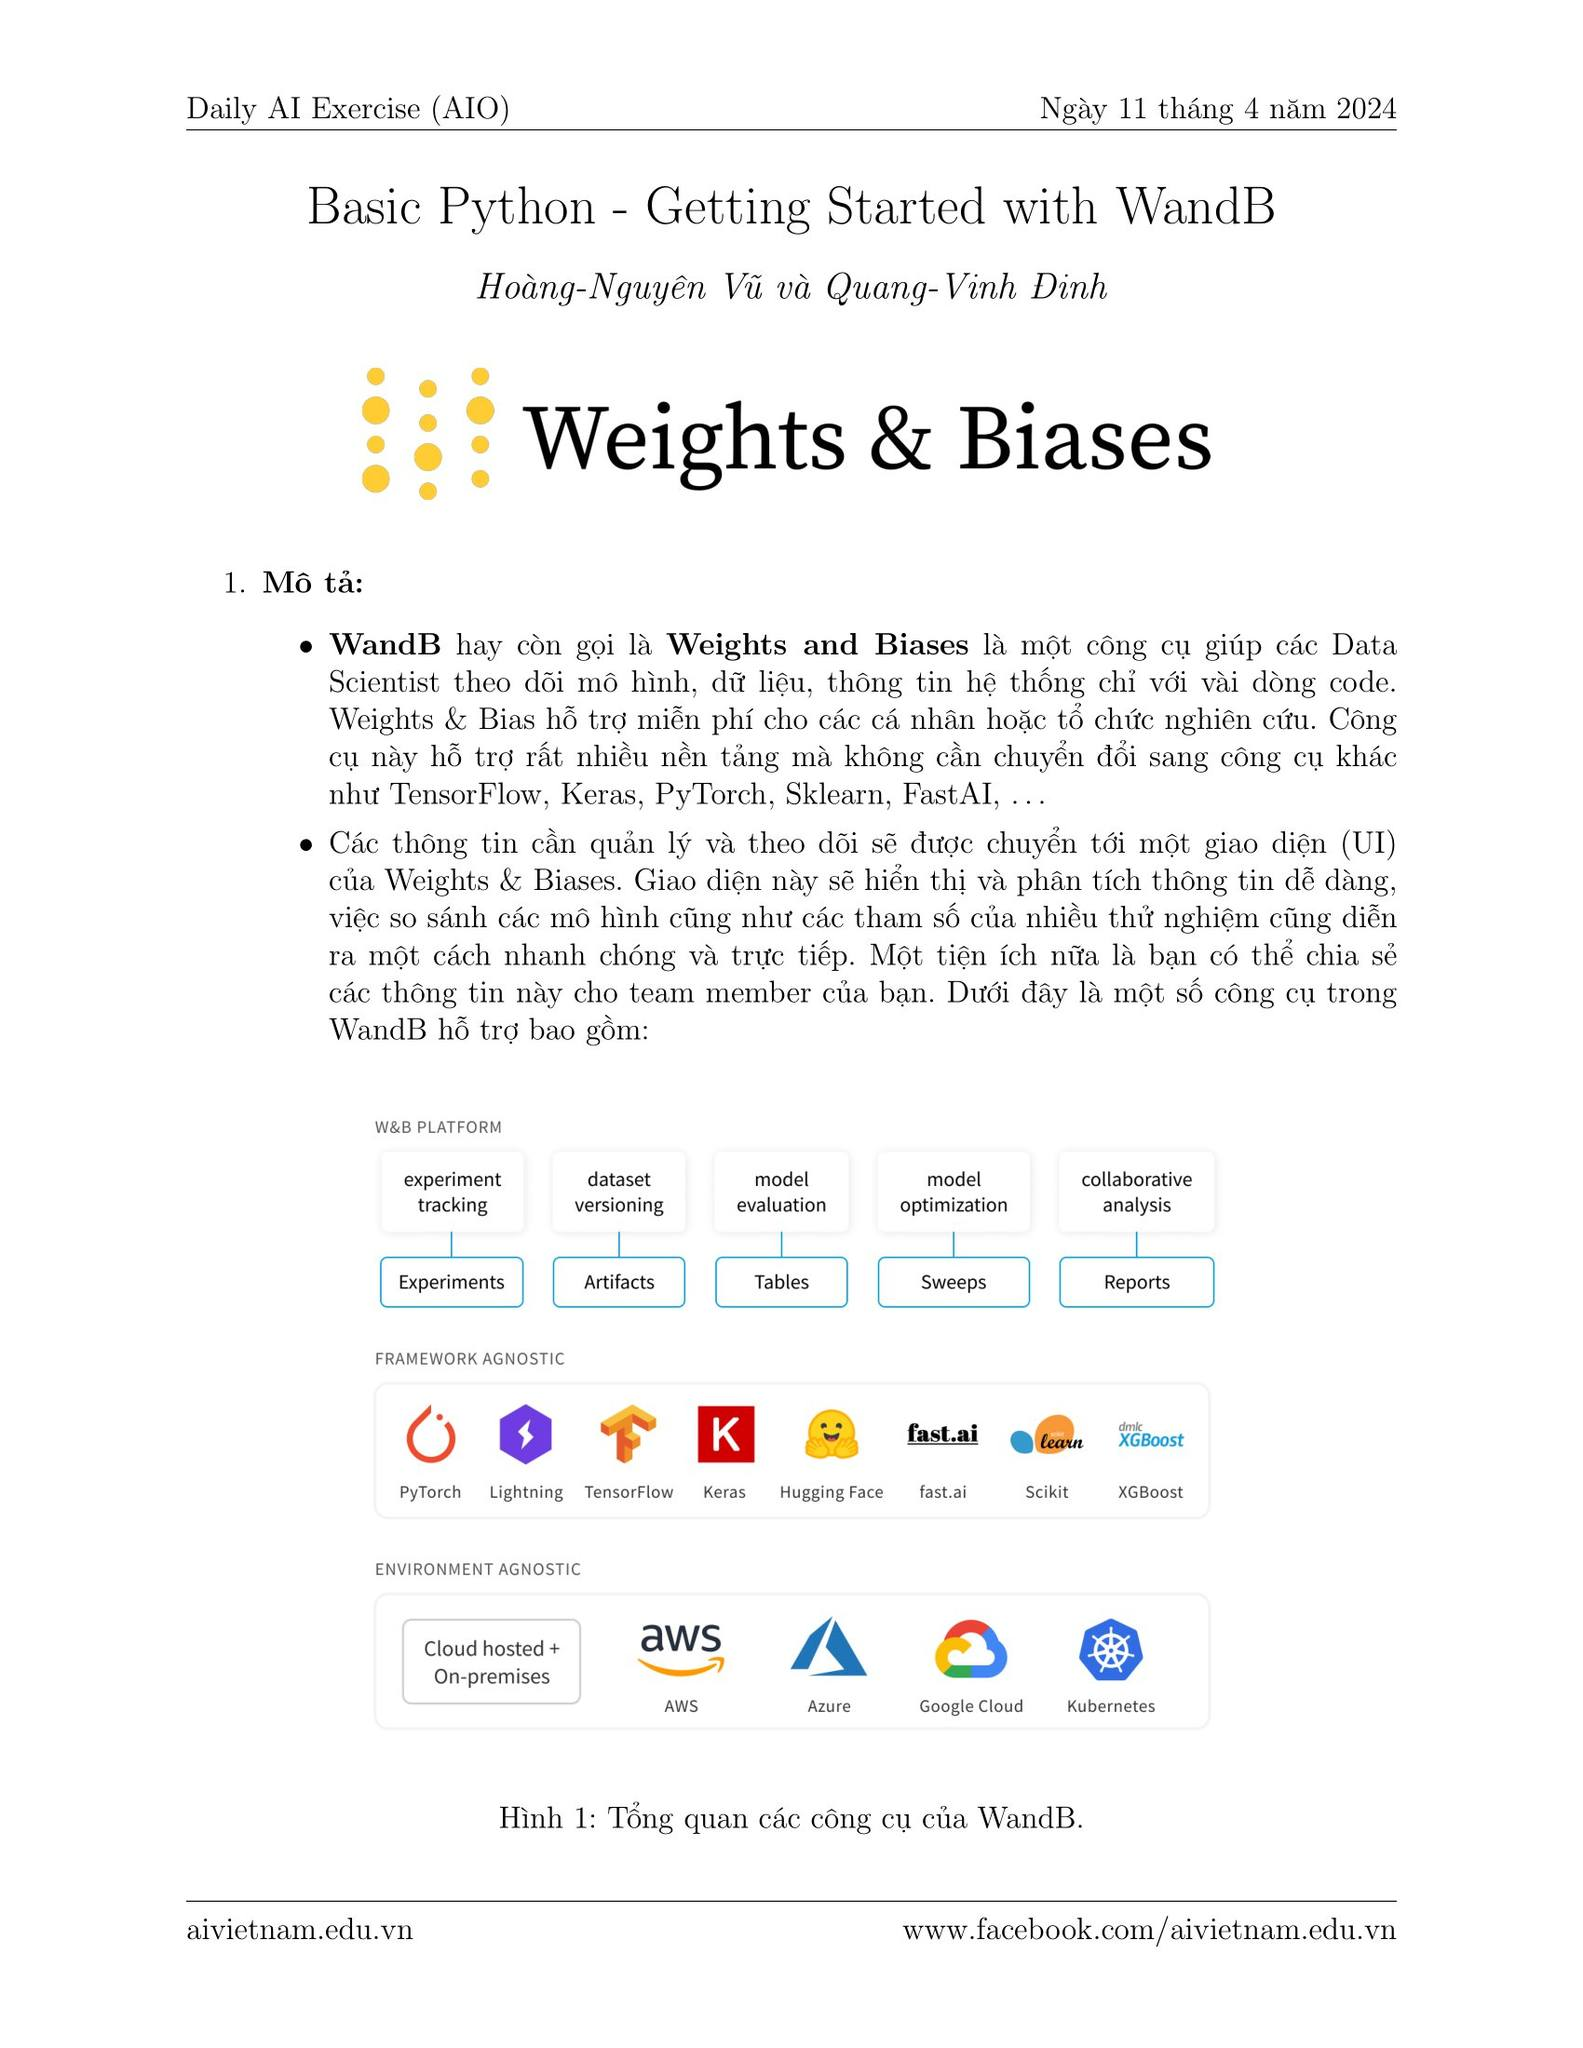
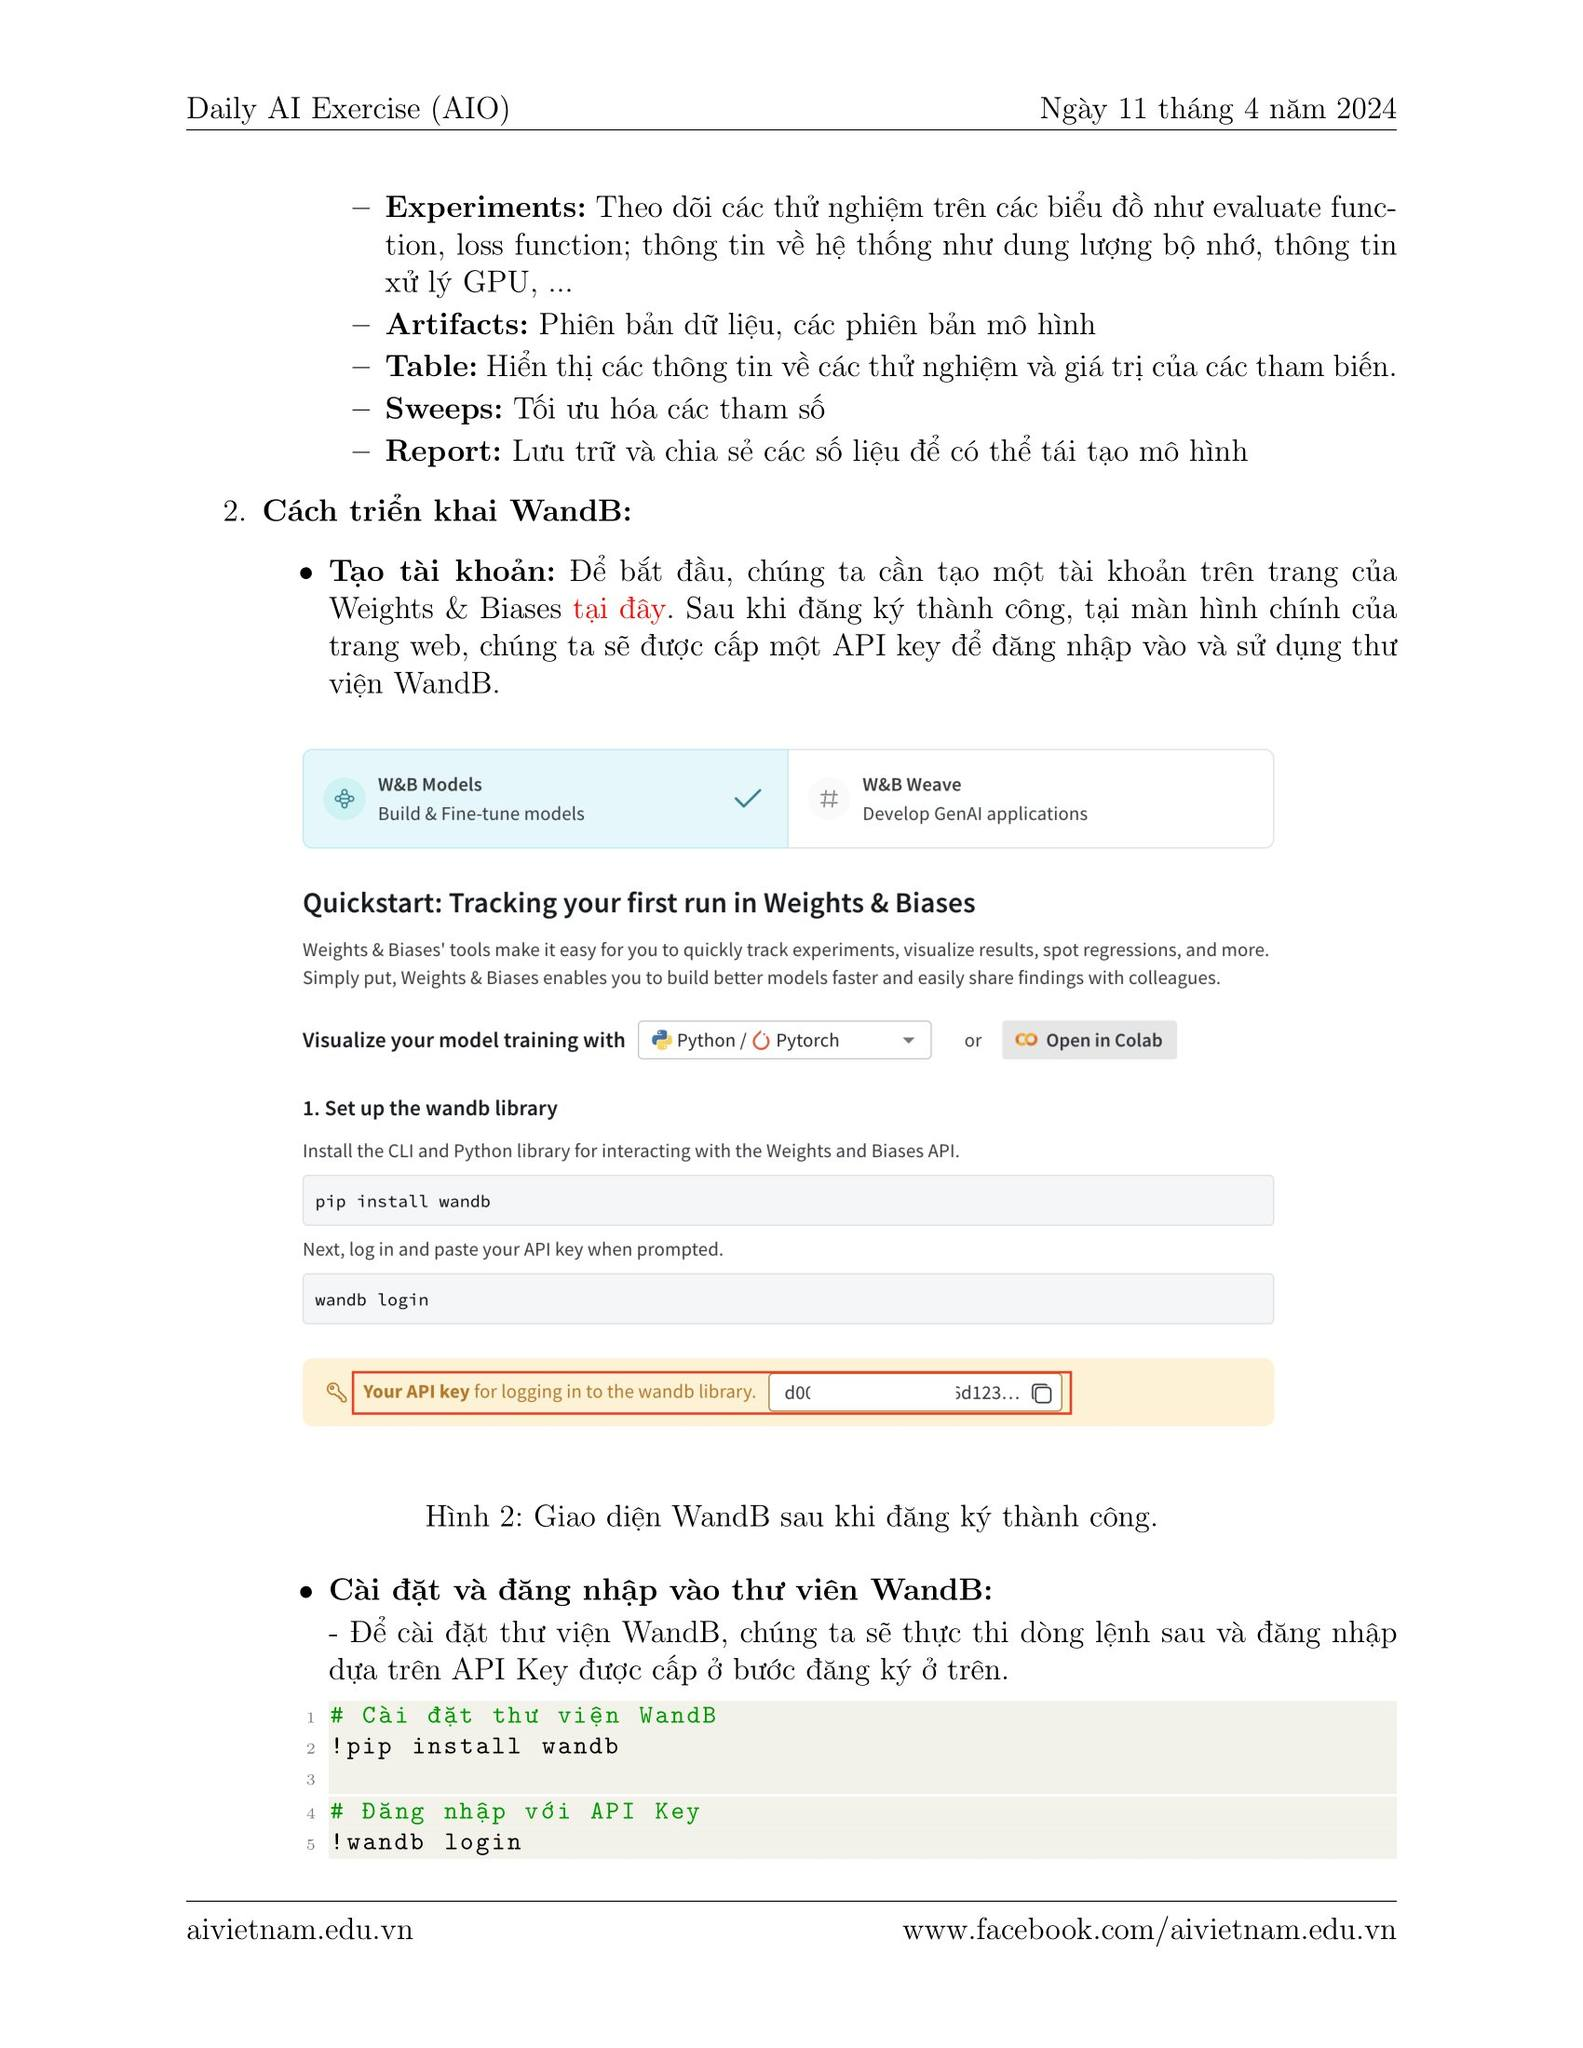
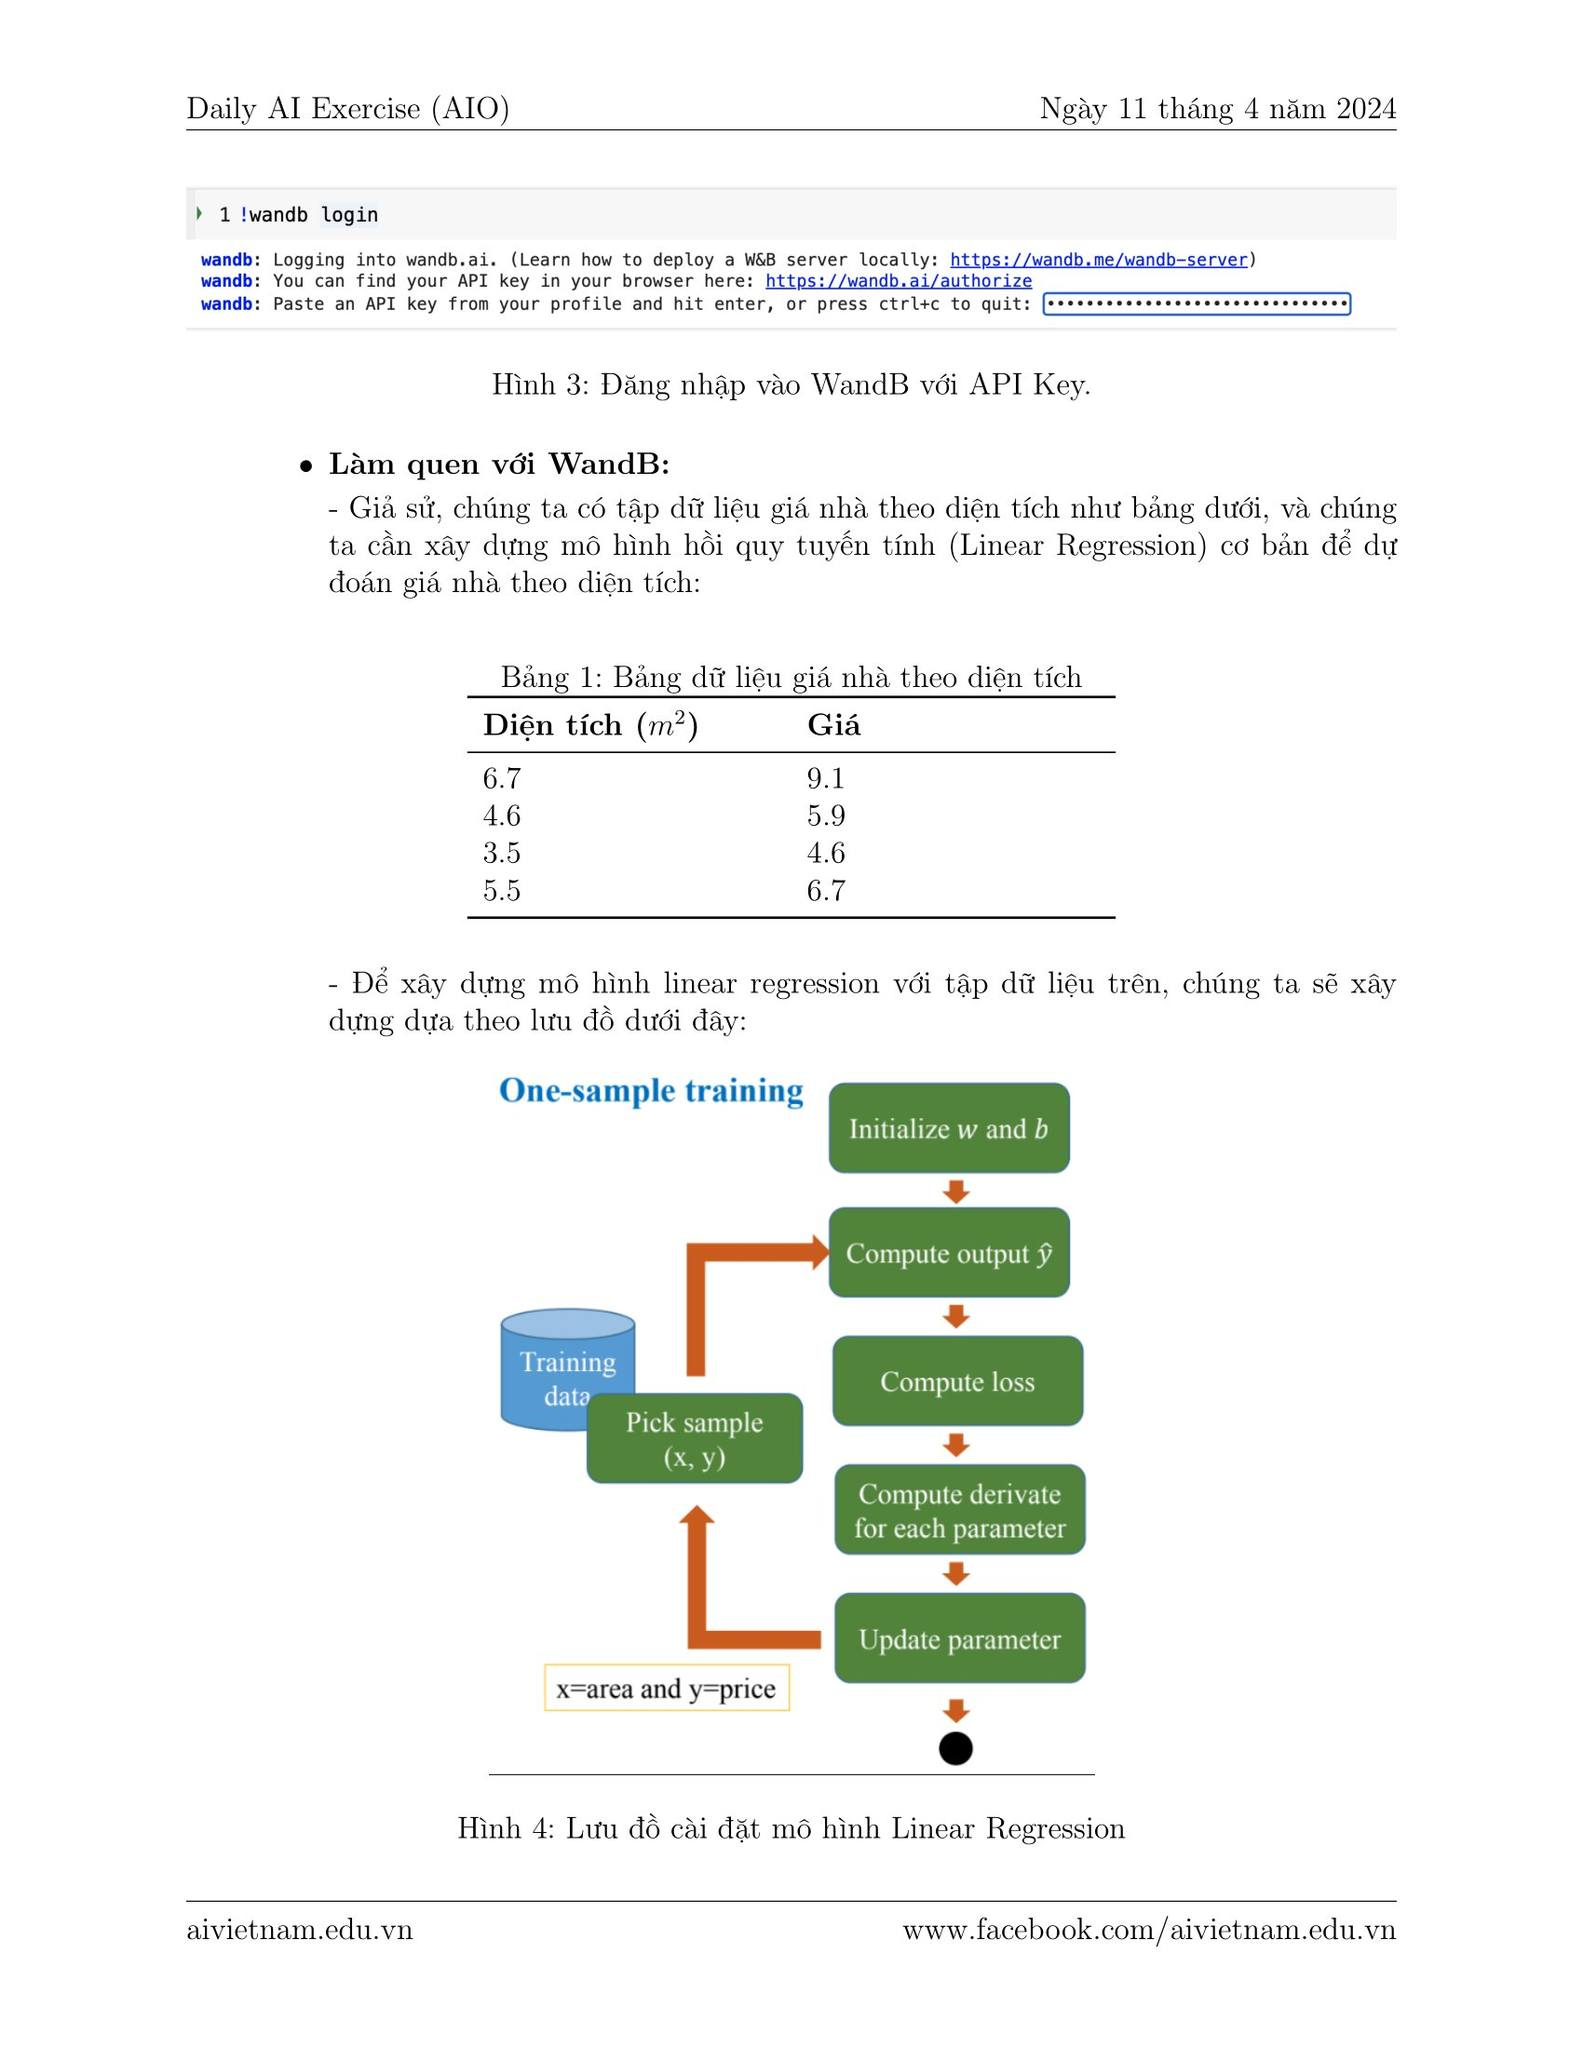
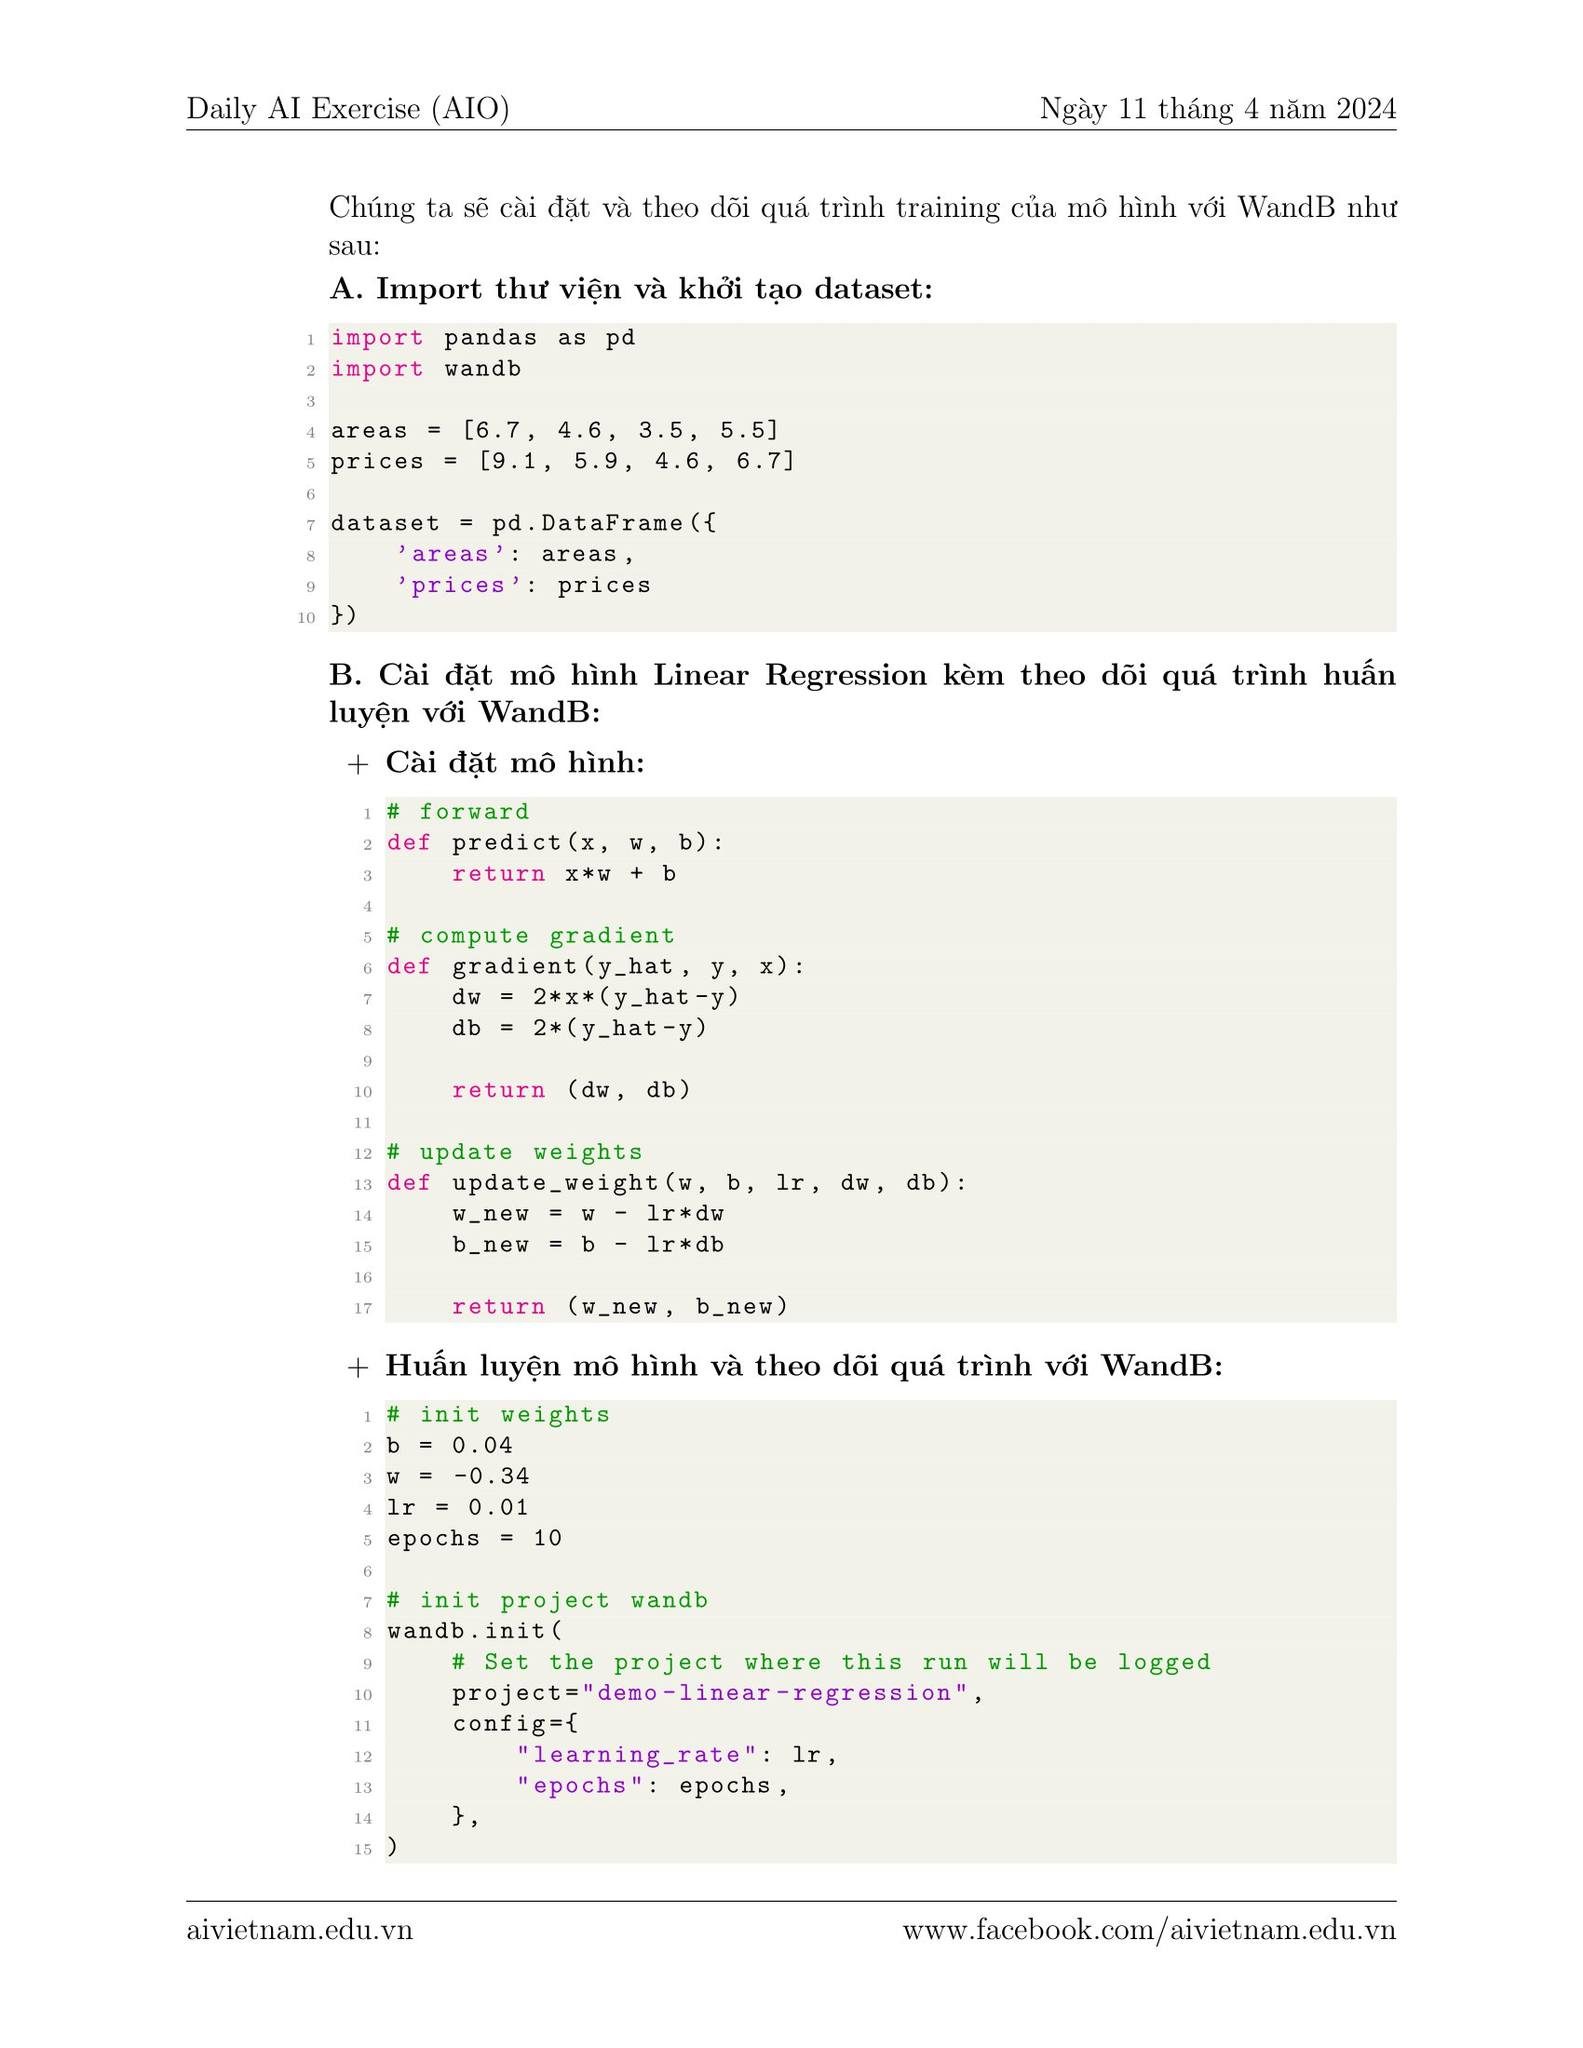
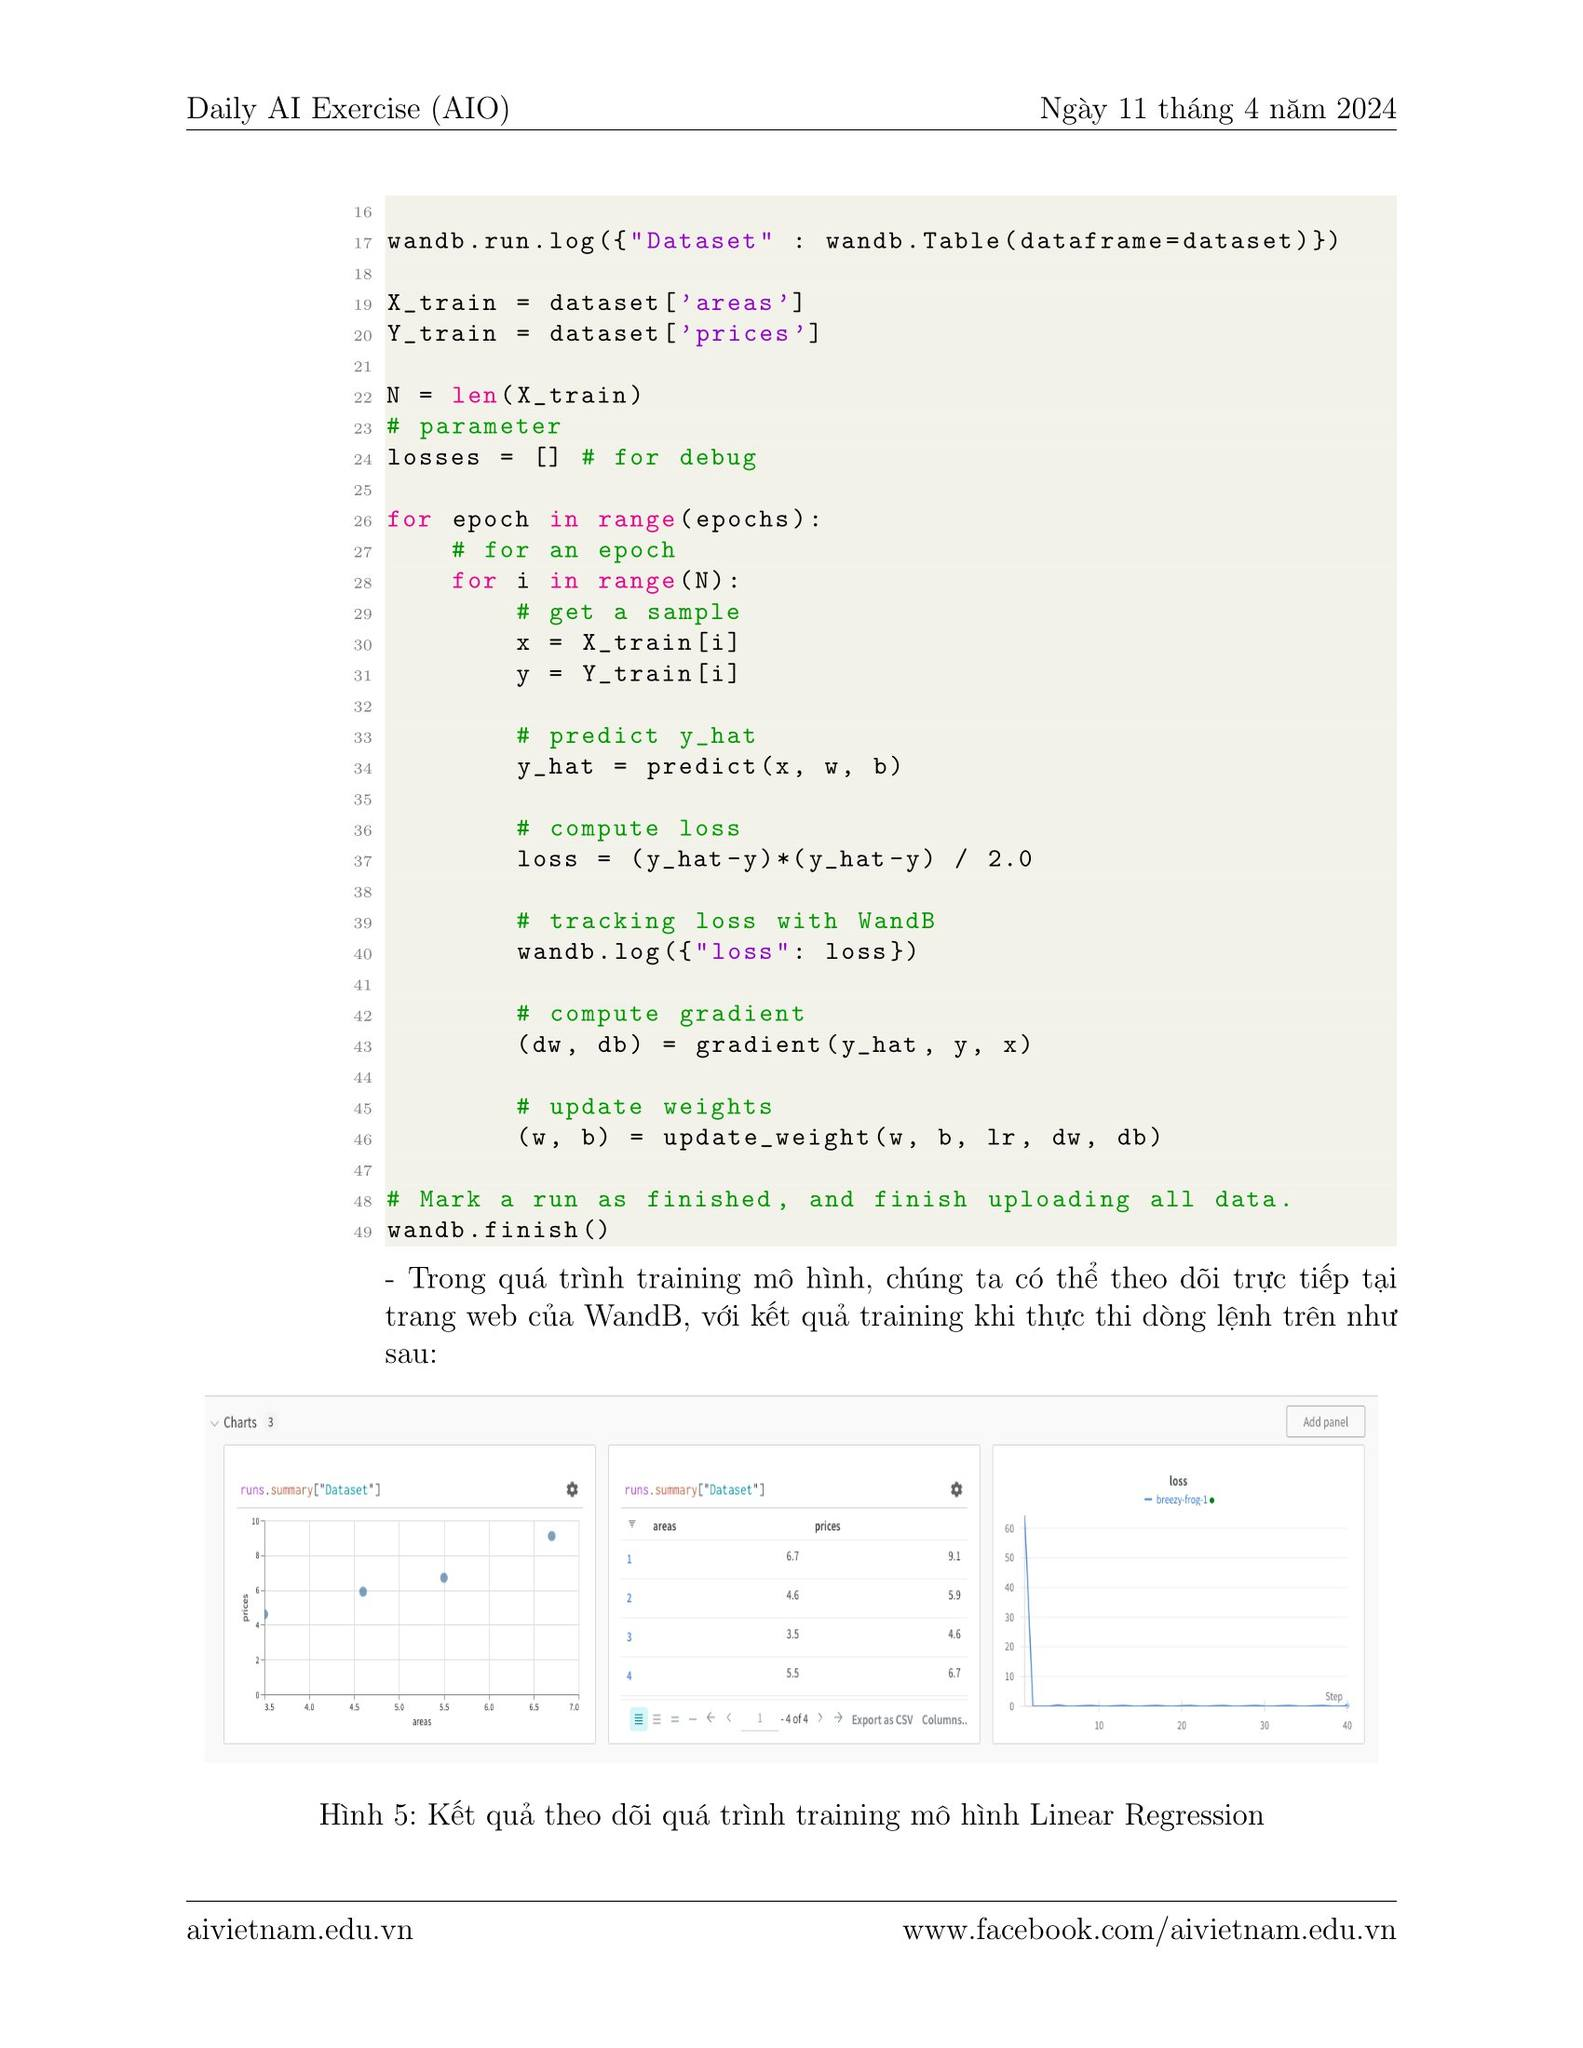
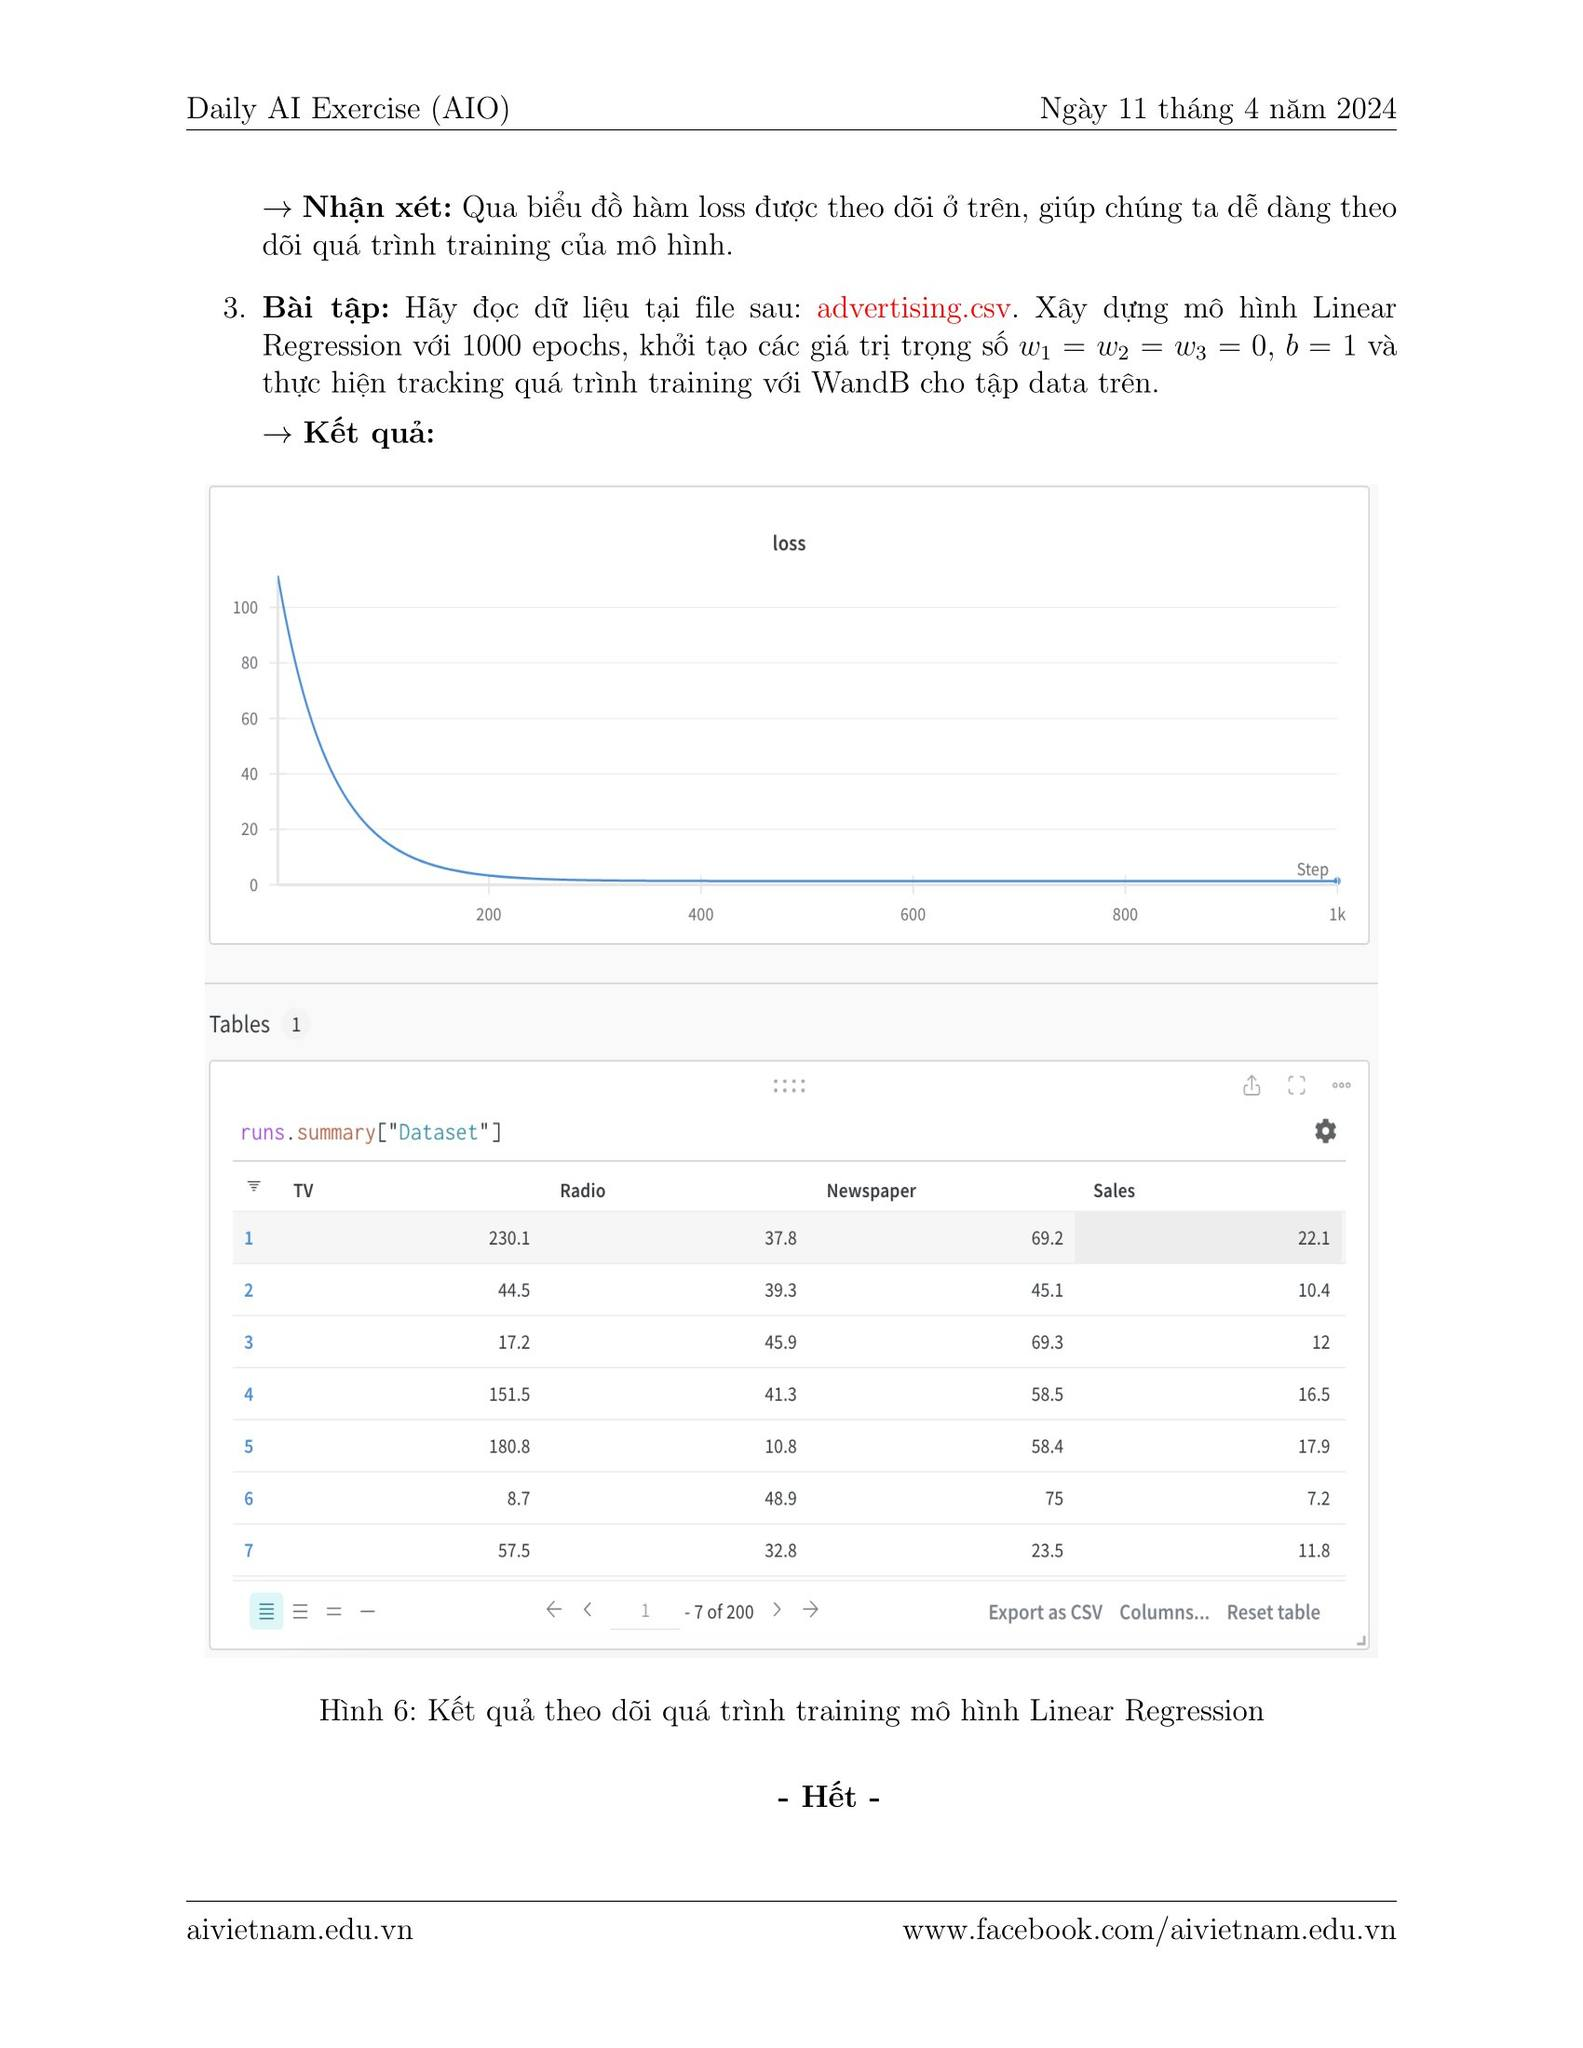

### A. Import thư viên và khởi tạo dataset

In [2]:
import pandas as pd 
import wandb

areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

dataset = pd.DataFrame({
    'areas': areas,
    'prices': prices
})

### B. Cài đặt mô hình Linear Regression kèm theo dõi quá trình huấn luyện vơi WandB

Cài đặt mô hình

In [3]:
# forward
def predict(x, w, b):
    return x*w + b

# compute gradient
def gradient(y_hat, y, x):
    dw = 2*x*(y_hat-y)
    db = 2*(y_hat-y)

    return (dw, db)

# update weights
def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db

    return (w_new, b_new)

Huấn luyện mô hình và theo dõi qua trình với WandB

In [4]:
# init weights
b = 0.04
w = -0.34
lr = 0.01
epochs = 10

# init project wandb
wandb.init(
    # Set the project where this run will be logged
    project = "demo-linear-regression",
    config={
        "learning_rate": lr,
        "epochs": epochs,
    },
)

wandb.run.log({"Dataset" : wandb.Table(dataframe=dataset)})

X_train = dataset['areas']
Y_train = dataset['prices']

N = len(X_train)
# parameter
losses = [] # for debug

for epoch in range(epochs):
    # for an epoch
    for i in range(N):
        # get a sample
        x = X_train[i]
        y = Y_train[i]

        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = (y_hat - y)*(y_hat - y) / 2.0

        # tracking loss with WandB
        wandb.log({"loss": loss})

        # compute gradient
        (dw, db) = gradient(y_hat, y, x)

        # update weights
        (w, b) = update_weight(w, b, lr, dw, db)

# Mark a run as finished, and finish uploading all data
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vo-minhbao9406 (minhbao1705). Use `wandb login --relogin` to force relogin


### Bài tập

In [1]:
import pandas as pd
import wandb
import numpy as np
data = pd.read_csv('advertising.csv')
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [2]:
def predict(x, w, b):

    if isinstance(x, pd.Series):
        x = x.values  # Convert Series to numpy array
    # print(np.dot(x, w))
    # Calculate the dot product of the input data and weights
    y_hat = np.dot(x, w) + b

    return y_hat

def gradient(y_hat, y, x):

    dw = 2 * x * (y_hat - y)
    db = 2 * (y_hat - y)

    return dw, db


def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db

    return (w_new, b_new)

In [3]:

# Separate features and target
X_train1 = data['TV']
X_train2 = data['Radio']
X_train3 = data['Newspaper']
Y_train = data['Sales']
# print(X_train)
# Train the model
# Set initial weights and learning rate
b = 1
w = np.array([0, 0, 0])  # These are sample values, you can initialize with different weights
lr = 0.00001
epochs = 1000
wandb.init(
    # Set the project where this run will be logged
    project = "advesting_losses",
    config={
        "learning_rate": lr,
        "epochs": epochs,
    },
)

wandb.run.log({"Dataset" : wandb.Table(dataframe=data)})
# Train the model
losses = []  # for debug
for epoch in range(epochs):
    for i in range(len(data)):
        x1 = X_train1.iloc[i]
        x2 = X_train2.iloc[i]
        x3 = X_train3.iloc[i]
        x = np.array([x1, x2, x3])
        y = Y_train.iloc[i]

        y_hat = predict(x, w, b)
        loss = (y_hat - y) * (y_hat - y) / 2.0
        
        # tracking loss with WandB
        wandb.log({"loss": loss})

        (dw, db) = gradient(y_hat, y, x)
        # print(w - lr*dw)
        (w, b) = update_weight(w, b, lr, dw, db)
# Mark a run as finished, and finish uploading all data
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vo-minhbao9406 (minhbao1705). Use `wandb login --relogin` to force relogin
